<a href="https://colab.research.google.com/github/grupo21dex/deliverable-2/blob/main/C%C3%B3pia_de_deliverable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas utilizadas:

In [ ]:
import numpy as np #calculo
import pandas as pd #data
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráfico
import scipy.stats as stats #estatistica
import geopy #localizacao

In [ ]:
df = pd.read_csv('Walmart.csv')

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


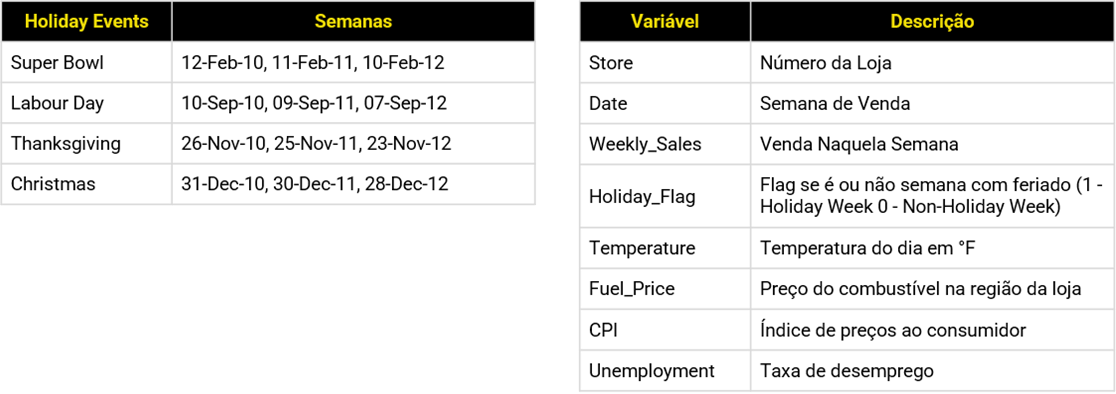

Criando a coluna ***Holiday_type*** que mostra se é dia normal ou feriado

In [ ]:
print(df['Date'].dtypes)

object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Verificando se só tem valores 0 e 1 na coluna ***Holiday_Flag***

In [ ]:
pd.DataFrame(df['Holiday_Flag'].value_counts())

,Holiday_Flag
0,5985
1,450


In [ ]:
len(df)

6435

Criando a lista ***Holiday_Type***

In [ ]:
#Super_boul
#Labour_day
#Thanksgiving
#Christmans

Holiday_Type = list()	
for x,y in enumerate(df['Holiday_Flag']):
  if y == 0:
    Holiday_Type.append('Regular day')
  elif y ==1:
    if df['Date'][x] == '12-02-2010' or df['Date'][x] == '11-02-2011' or df['Date'][x] == '10-02-2012':
      Holiday_Type.append('Super_Boul')
    if df['Date'][x] == '10-09-2010' or df['Date'][x] == '09-09-2011' or df['Date'][x] == '07-09-2012':
      Holiday_Type.append('Labour_Day')
    if df['Date'][x] == '26-11-2010' or df['Date'][x] == '25-11-2011' or df['Date'][x] == '23-11-2012':
      Holiday_Type.append('Thanksgiving')
    if df['Date'][x] == '31-12-2010' or df['Date'][x] == '30-12-2011' or df['Date'][x] == '28-12-2012':
      Holiday_Type.append('Christmans')

#pd.DataFrame(Holiday_Type).value_counts()#possui vendas em dias de feriados que não são os descritos


Adicionando a coluna ***Holiday_type*** que diz se é um dia normal ou qual feriado

In [ ]:
df['Holiday_type'] = Holiday_Type

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Regular day
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super_Boul
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Regular day
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Regular day
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Regular day
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Regular day
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Regular day
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Regular day
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Regular day


Fazendo a correlação

pqp, sfd, tmnc outro dataframe sem correlaçao ..|..

Só Unemployment e Weekly_Sales tem uma correlação negativa (passou de -1 achava que so ia até -1 pqp²)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


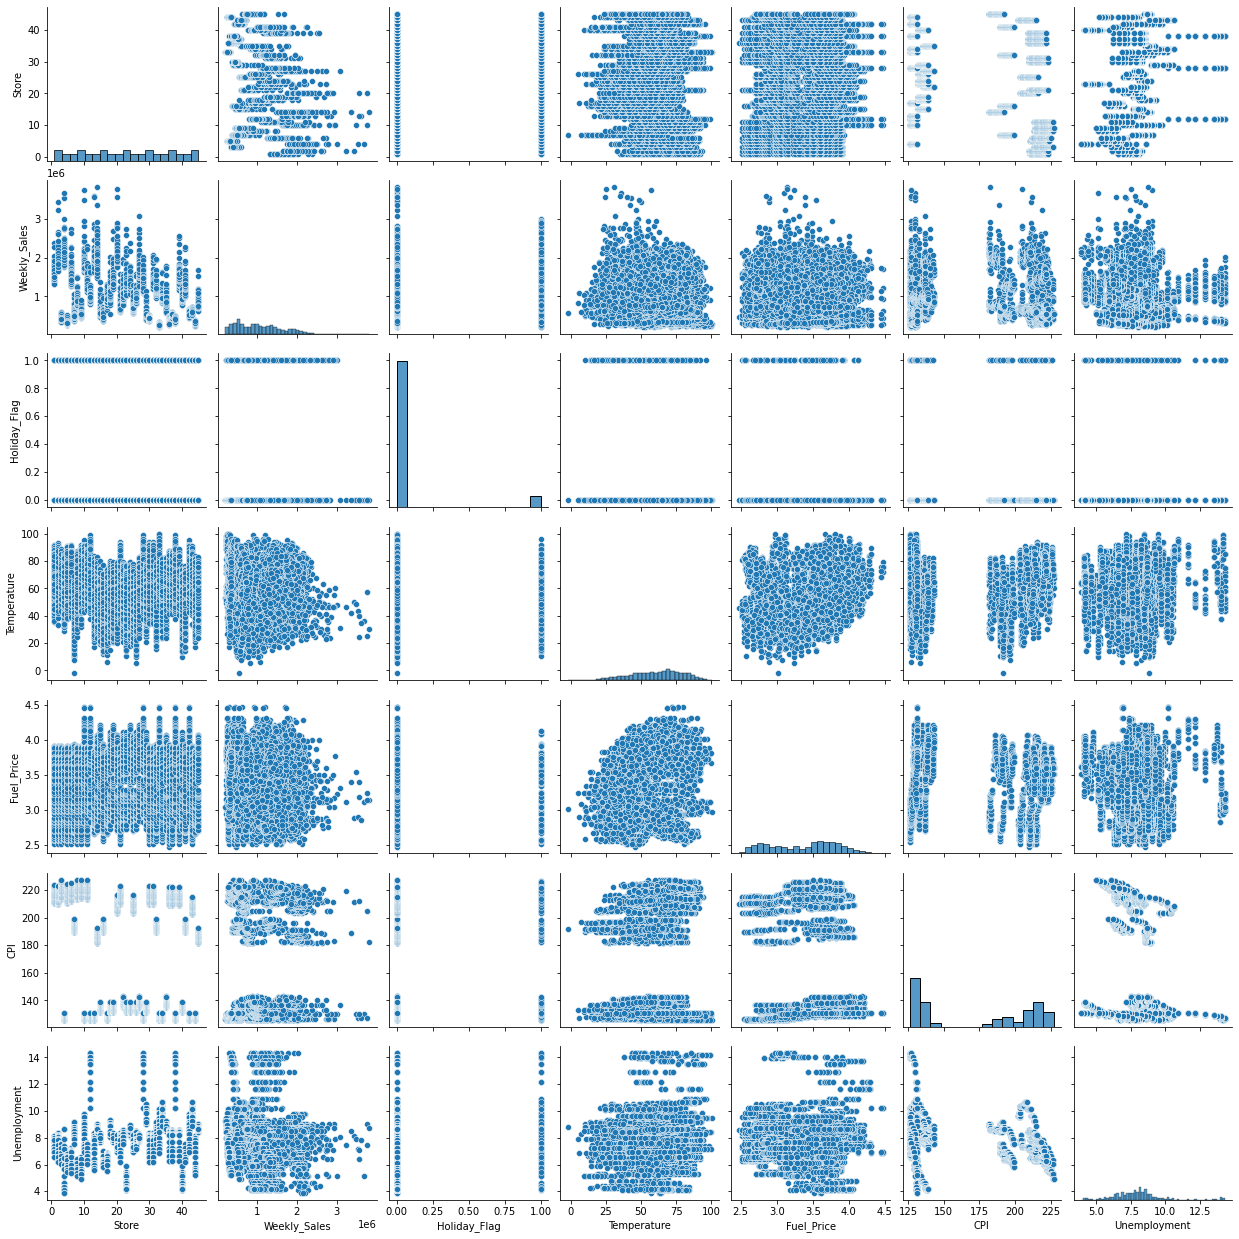

In [ ]:
sns.pairplot(df)
df.corr()

In [ ]:
df.corr()['Weekly_Sales']

Store          -0.335332
Weekly_Sales    1.000000
Holiday_Flag    0.036891
Temperature    -0.063810
Fuel_Price      0.009464
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64

Colocando em ordem decrescente usando a coluna ***Weekly_Sales***

In [ ]:
df.sort_values(by=['Weekly_Sales'],ascending=False).head(30)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_type
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.544590,8.724,Regular day
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484,Regular day
1333,10,24-12-2010,3749057.69,0,57.06,3.236,126.983581,9.003,Regular day
527,4,23-12-2011,3676388.98,0,35.92,3.103,129.984548,5.143,Regular day
1762,13,24-12-2010,3595903.20,0,34.90,2.846,126.983581,7.795,Regular day
1814,13,23-12-2011,3556766.03,0,24.76,3.186,129.984548,6.392,Regular day
2815,20,23-12-2011,3555371.03,0,40.19,3.389,212.236040,7.082,Regular day
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127,Regular day
1385,10,23-12-2011,3487986.89,0,48.36,3.541,129.984548,7.874,Regular day
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163,Regular day


Verificando qual loja teve mais vendas, fazer somatorio das vendas de cada loja

O Índice de Preços ao Consumidor (IPC) mede a variação de preços de um conjunto fixo de bens e serviços componentes de despesas habituais de famílias com nível de renda situado entre 1 e 33 salários mínimos mensais.

Verifica-se que os feriados nao exercem mta influencia para as vendas, obs verificar proximidades com o feriado(ex: as maiores vendas foram nos dias 23 e 24, considerou natal dias 28,30 e 31, não podemos só olhar o dia dos feriados precisaremos ver a proximidade,)

Verificar se as lojas proximas aos acontecimentos especificos dos feriados exercem alguma influencia na venda(ex no feriado do ***Super_Boul*** as lojas proximas ao local ocorre mais influencia desse feriado): Precisa conseguir os endereços das lojas e dos acontecimentos do feriado



Pq estão pedindo tanto destaque com feriados se precisamos considerar as lojas que mais vendem o ano inteiro já que o aumento da loja é uma mudança permanente

fazer somatorio de todas as ***Weekly_Sales*** por loja para identificar as que tiveram maior volume de vendas

Regiao x desemprego x populacao da regiao*

quantidade de venda pelo tamanho da loja: pesquisar se é possivel conseguir esse dado:

---

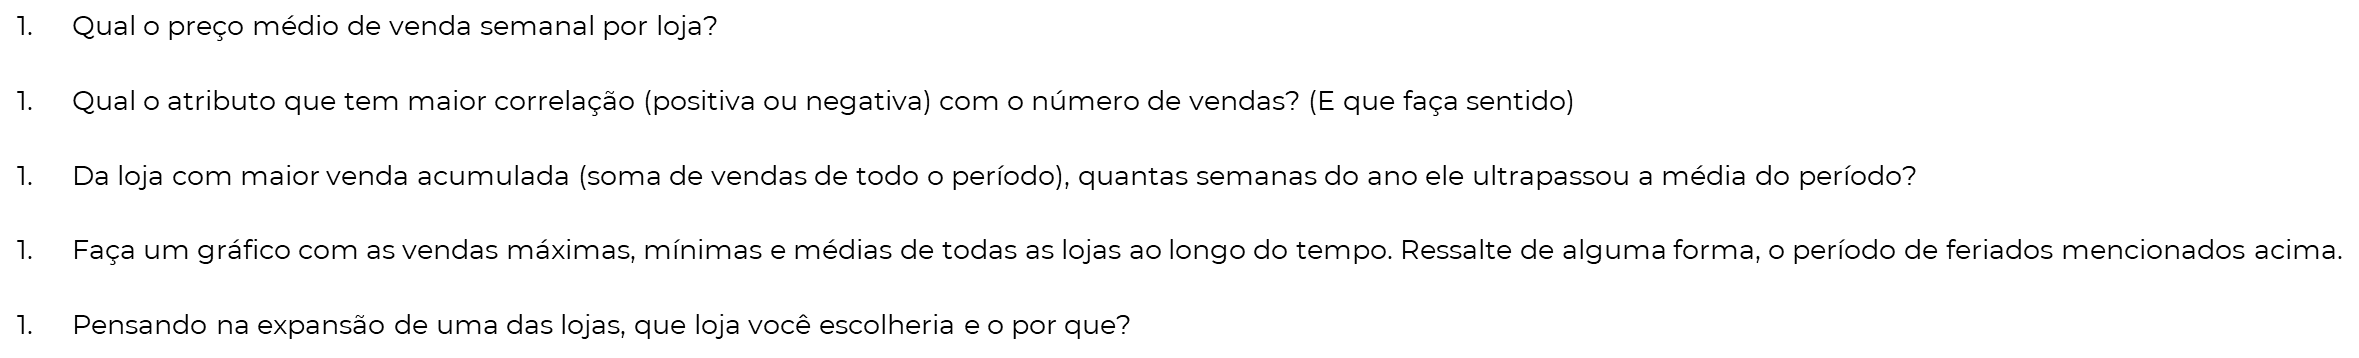